In [2]:
import numpy as np
import pandas as pd
returns = pd.read_csv('Portfolios_Formed_on_ME_monthly_EW.csv', header=0, index_col=0, parse_dates=True, na_values=-99.99)
returns.head()

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,NaN,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,NaN,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70


In [3]:
#we are interested in these 2 columns: 'Lo 20' and 'Hi 20'
columns = ['Lo 20', 'Hi 20']
returns = returns[columns]
returns

,Lo 20,Hi 20
192607,-0.57,3.33
192608,3.84,2.33
192609,-0.48,-0.09
192610,-3.29,-2.95
192611,-0.55,3.16
...,...,...
201808,3.09,2.49
201809,-2.04,0.19
201810,-10.52,-7.41
201811,-2.78,2.49


In [4]:
#convert values from percentages to raw numbers
returns = returns/100
returns

,Lo 20,Hi 20
192607,-0.0057,0.0333
192608,0.0384,0.0233
192609,-0.0048,-0.0009
192610,-0.0329,-0.0295
192611,-0.0055,0.0316
...,...,...
201808,0.0309,0.0249
201809,-0.0204,0.0019
201810,-0.1052,-0.0741
201811,-0.0278,0.0249


In [5]:
#rename the columns
returns.columns = ['SmallCap', 'LargeCap']
returns

,SmallCap,LargeCap
192607,-0.0057,0.0333
192608,0.0384,0.0233
192609,-0.0048,-0.0009
192610,-0.0329,-0.0295
192611,-0.0055,0.0316
...,...,...
201808,0.0309,0.0249
201809,-0.0204,0.0019
201810,-0.1052,-0.0741
201811,-0.0278,0.0249


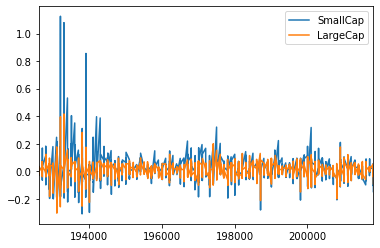

In [6]:
%matplotlib inline
returns.plot.line()

In [7]:
vol = returns.std()
vol

SmallCap    0.097197
LargeCap    0.056325
dtype: float64

In [8]:
annualized_vol = vol*np.sqrt(12)
annualized_vol

SmallCap    0.336701
LargeCap    0.195116
dtype: float64

In [9]:
n_months = returns.shape[0]
#compounded returns is (returns + 1).prod() - 1
#now returns per month:
return_per_month = (returns + 1).prod()**(1/n_months) - 1
return_per_month

SmallCap    0.011860
LargeCap    0.007859
dtype: float64

In [10]:
annualized_return = (return_per_month+1)**12 - 1
annualized_return

SmallCap    0.151977
LargeCap    0.098490
dtype: float64

In [12]:
annualized_return/annualized_vol

SmallCap    0.451370
LargeCap    0.504778
dtype: float64

In [15]:
#assume riskfree_rate is 0.03
riskfree_rate = 0.03
excess_return = annualized_return - riskfree_rate
sharpe_ratio_y = excess_return/annualized_vol
sharpe_ratio_y

SmallCap    0.362271
LargeCap    0.351023
dtype: float64

Small caps have a higher sharpe ratio than large caps.

In [17]:
sharpe_ratio_m = (return_per_month - 0.0025)/vol
sharpe_ratio_m

SmallCap    0.096296
LargeCap    0.095140
dtype: float64